# Wine Quality model prediction 
## (Kaggle project)

#  Kumar Gaurav, Msc(data science) student 

In [1]:
!python --version # version of python

Python 3.7.6


In [2]:
import sklearn,pandas,numpy

In [3]:
pandas.__version__ 

'1.0.1'

In [4]:
numpy.__version__

'1.18.1'

In [5]:
sklearn. __version__

'0.24.2'

In [6]:
import pandas as pd  # import all library as per require
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm,boxcox

In [7]:
wine = pd.read_csv('winequality-red.csv') # Dataset is given on Kaggle ,just downloaded from there
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.shape

(1599, 12)

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [11]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
wine.shape

(1599, 12)

## Null values visualization

In [13]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

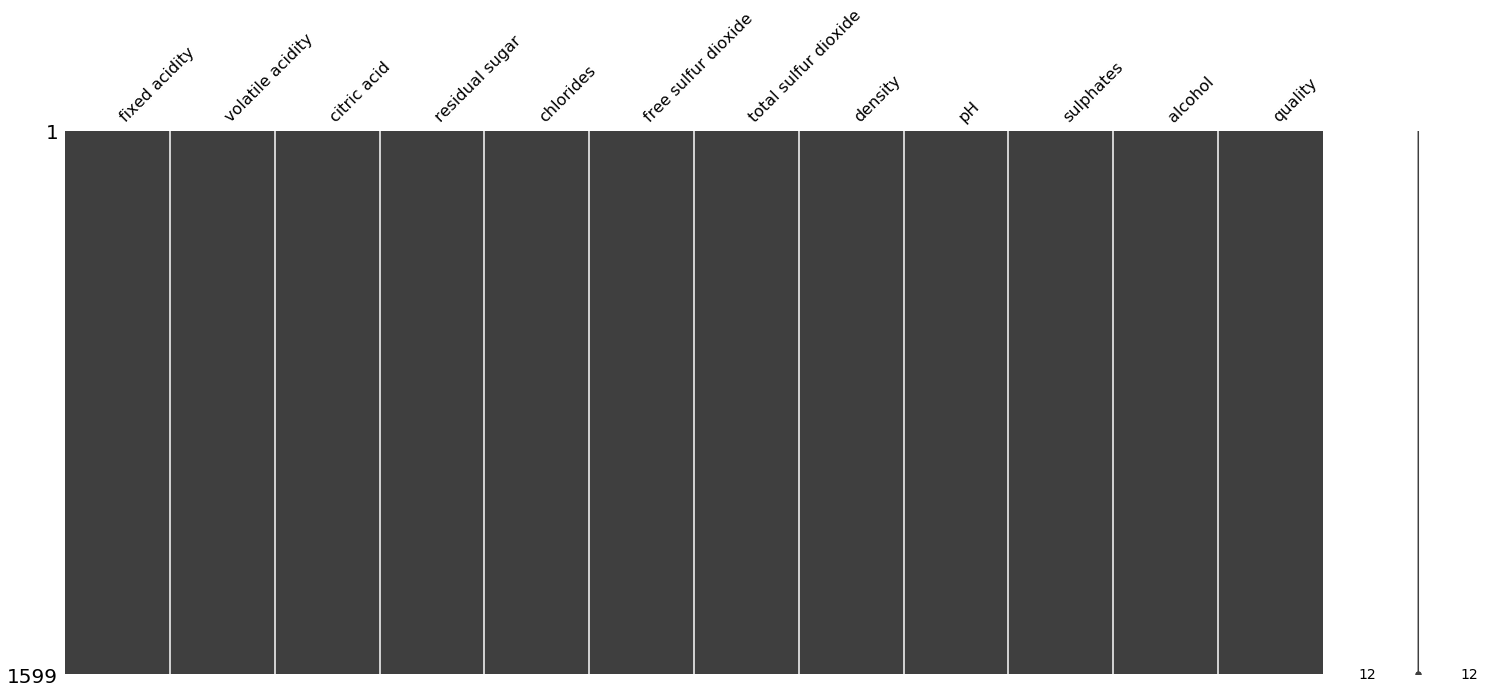

In [14]:
import missingno as msno
msno.matrix(wine)

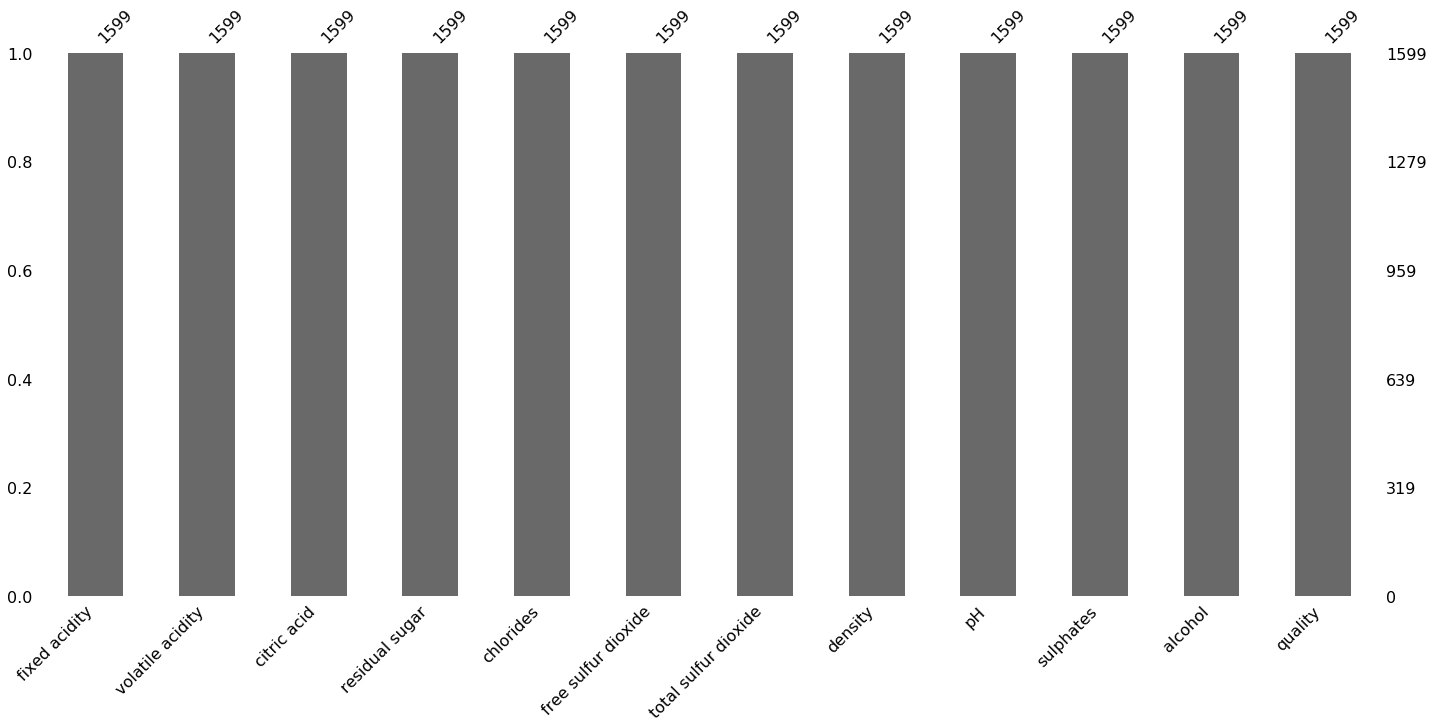

In [15]:
msno.bar(wine)

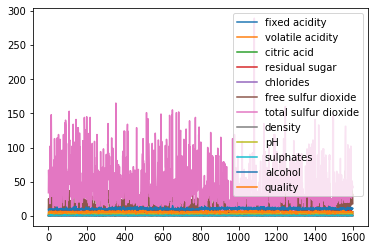

In [16]:
wine.plot()

## correlation work

In [17]:
wine_corr = wine.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


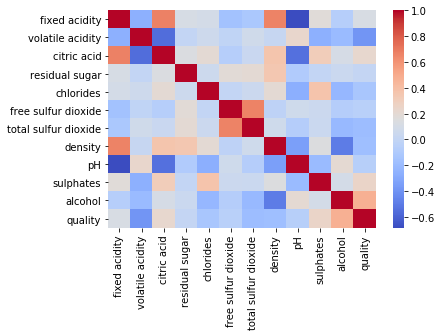

In [18]:
import seaborn as sns
sns.heatmap(wine_corr,cmap = 'coolwarm')

In [19]:
col_names = wine.columns
col_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## EDA part

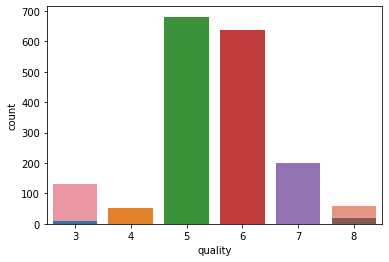

In [20]:
for col in col_names :
    sns.countplot(x =col, data = wine)

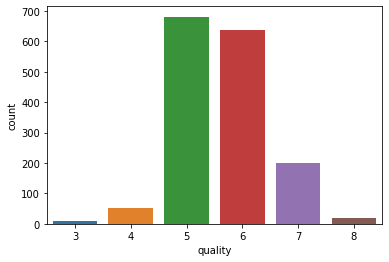

In [21]:
sns.countplot(x ='quality', data = wine)

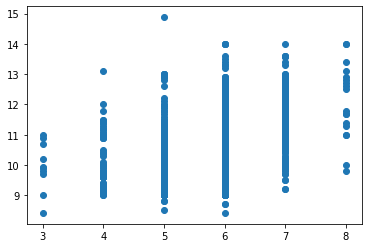

In [22]:
plt.scatter(wine["quality"],wine["alcohol"])

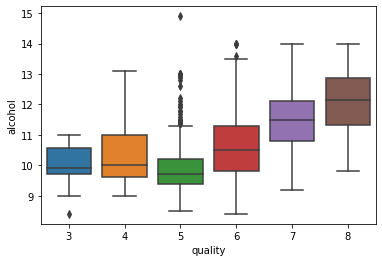

In [23]:
sns.boxplot(x="quality",y="alcohol", data=wine)

In [24]:
from collections import Counter
Counter(wine['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

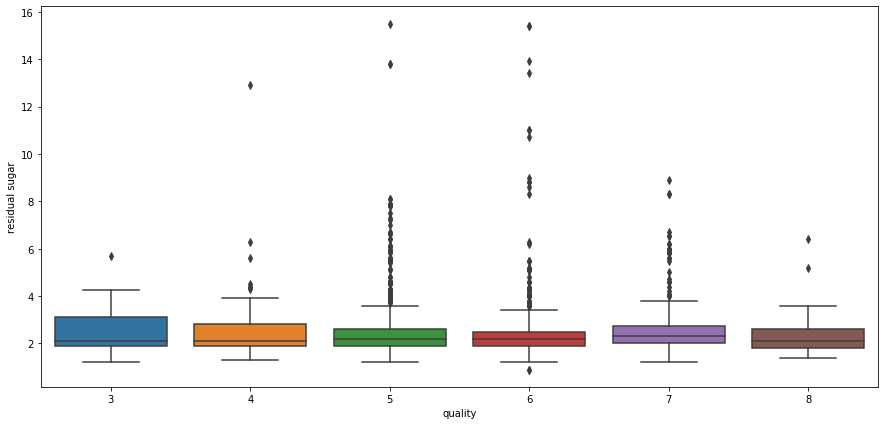

In [25]:
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="residual sugar", data=wine)

In [26]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [27]:
Q1 = wine[cols].quantile(0.25)
Q3 = wine[cols].quantile(0.75)

IQR = Q3- Q1
print(IQR)

fixed acidity           2.100000
volatile acidity        0.250000
citric acid             0.330000
residual sugar          0.700000
chlorides               0.020000
free sulfur dioxide    14.000000
density                 0.002235
pH                      0.190000
sulphates               0.180000
alcohol                 1.600000
dtype: float64


## visualized with normal graph,
## skewedness 

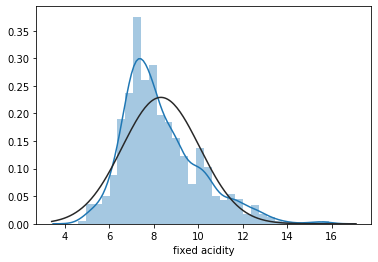

In [31]:
from scipy import stats
sns.distplot(wine['fixed acidity'],fit = norm)

((array([-3.33053651, -3.075151  , -2.93323893, ...,  2.93323893,
          3.075151  ,  3.33053651]),
  array([ 4.6,  4.7,  4.9, ..., 15.6, 15.6, 15.9])),
 (1.692490335637927, 8.31963727329581, 0.9705990367383132))

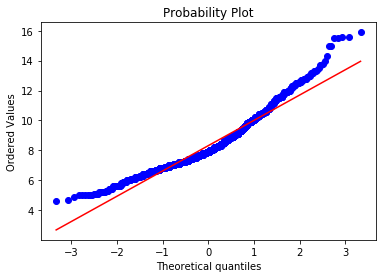

In [33]:

stats.probplot(wine["fixed acidity"], plot = plt)

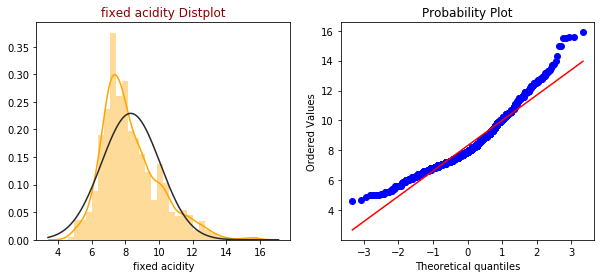

In [34]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(wine["fixed acidity"], fit=norm, color="orange")
plt.title("fixed acidity Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(wine["fixed acidity"], plot = plt)
plt.show()

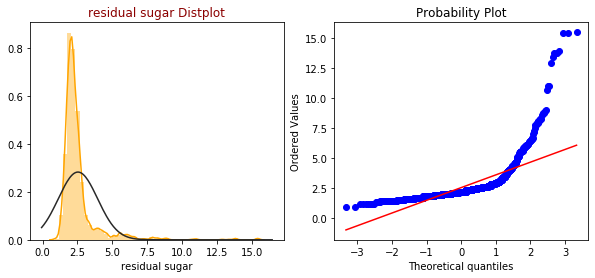

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(wine["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(wine["residual sugar"], plot = plt)
plt.show()

In [36]:
wine["residual sugar"], lam_fixed_acidity = boxcox(wine["residual sugar"])

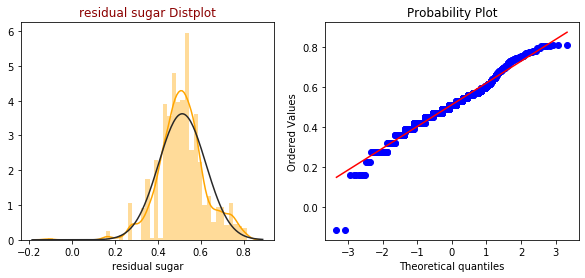

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(wine["residual sugar"], fit=norm, color="orange")
plt.title("residual sugar Distplot", color = "darkred")
plt.subplot(1,2,2)
stats.probplot(wine["residual sugar"], plot = plt)
plt.show()

## fixing skewness using boxcox

In [38]:
wine["fixed acidity"], lam = boxcox(wine["fixed acidity"])

In [39]:
#Fixing skewness using boxcox
wine["free sulfur dioxide"], lam_fixed_acidity = boxcox(wine["free sulfur dioxide"])

In [40]:
#Fixing skewness using boxcox
wine["total sulfur dioxide"], lam_fixed_acidity = boxcox(wine["total sulfur dioxide"])

In [41]:
#Fixing skewness using boxcox
wine["alcohol"], lam_fixed_acidity = boxcox(wine["alcohol"])

In [42]:
wine['quality'].values

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

## wine quality scalling in 1,2,3 with column rating

In [43]:
rating = []
for num in wine['quality']:
    if num <= 4:
        rating.append('1')
    elif num <=7 :
        rating.append('2')
    elif num ==8 :
        rating.append('3')
wine["rating"] = rating
        
        
        

In [44]:
from collections import Counter
Counter(wine['quality'])  # count every row with number

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [45]:
Counter(wine['rating'])

Counter({'2': 1518, '1': 63, '3': 18})

In [46]:
x = wine.drop('quality',axis = 1)

# PCA

In [47]:
pca = PCA()

In [48]:
x_pca = pca.fit_transform(x)

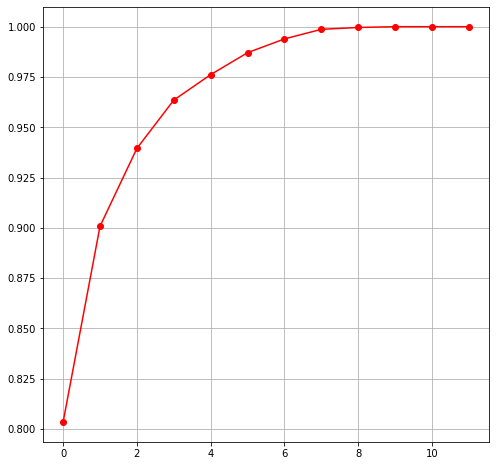

In [49]:
plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()
plt.show()

In [50]:
new_pca = PCA(n_components = 8)
new_pca.fit_transform(x)

array([[-0.26421366,  0.05051731,  0.33922719, ...,  0.04888194,
         0.00845628,  0.03111742],
       [ 1.21455873, -0.05860345,  0.27227432, ..., -0.31664888,
         0.04964319, -0.08699835],
       [ 0.43810846,  0.22526499,  0.24008532, ..., -0.16144937,
         0.0587462 , -0.06772005],
       ...,
       [ 0.99772982, -0.71313651,  0.02715106, ...,  0.02671376,
        -0.02238335, -0.0461304 ],
       [ 1.19670756, -0.73696865,  0.16420511, ...,  0.03647319,
        -0.07637579,  0.09559929],
       [ 0.45147704, -0.1705262 , -0.22301896, ...,  0.15792403,
        -0.18086472, -0.02620968]])

In [51]:
new_x = new_pca.fit_transform(x)

In [95]:
x_train,x_test,y_train,y_test = train_test_split(new_x,rating,test_size = 0.50)

# working with imbalanced dataset with help of imlearn library

In [96]:
from scipy import stats
from imblearn.over_sampling import SMOTE

In [97]:
sm = SMOTE(random_state = 14)

In [98]:
x_train,y_train = sm.fit_resample(x_train,y_train)

In [99]:
import collections
collections.Counter(y_train)

Counter({'2': 759, '1': 759, '3': 759})

In [91]:
model = RandomForestClassifier() # used random forest classifier

In [100]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
prediction_x = model.predict(x_test)

## accuracy with random forest 

In [102]:
accuracy = accuracy_score(prediction_x , y_test)
accuracy

0.99875

### classification report ,score and confusion matrix

In [104]:
from sklearn.metrics import confusion_matrix,classification_report
classification_report(y_test,prediction_x)

'              precision    recall  f1-score   support\n\n           1       1.00      0.97      0.98        32\n           2       1.00      1.00      1.00       759\n           3       1.00      1.00      1.00         9\n\n    accuracy                           1.00       800\n   macro avg       1.00      0.99      0.99       800\nweighted avg       1.00      1.00      1.00       800\n'

In [105]:
confusion_matrix(prediction_x, y_test)

array([[ 31,   0,   0],
       [  1, 759,   0],
       [  0,   0,   9]], dtype=int64)

In [109]:
model.score(x_train,y_train)

1.0

In [107]:
accuracy

0.99875

## Now working with support vector machine 

In [110]:
from sklearn.svm import SVC

In [119]:
x_train,x_test,y_train,y_test = train_test_split(new_x,rating,test_size = 0.80)

In [120]:
classifier_svm = SVC(kernel= 'sigmoid')

In [121]:
classifier_svm.fit(x_train,y_train) # used sigmoid function

SVC(kernel='sigmoid')

## training score

In [122]:
classifier_svm.score(x_train,y_train)

0.9780564263322884

In [123]:
y_pred = classifier_svm.predict(x_test)

# Model accuracy

In [125]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9640625

### classification report ,score, confusion matrix

In [126]:
classification_report(y_pred,y_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.46      0.96      0.62        25\n           2       1.00      0.96      0.98      1255\n           3       0.00      0.00      0.00         0\n\n    accuracy                           0.96      1280\n   macro avg       0.49      0.64      0.53      1280\nweighted avg       0.99      0.96      0.97      1280\n'

In [127]:
confusion_matrix(y_pred,y_test)

array([[  24,    1,    0],
       [  28, 1210,   17],
       [   0,    0,    0]], dtype=int64)

# accuracy

In [128]:
accuracy

0.9640625